In [5]:
#Importing the library
import matplotlib.pyplot as plot
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as seaborn

In [6]:
synthTrainingData = pd.read_csv("C:/Users/welcome/Documents/Vishal/synth.te.csv")
synthTestData = pd.read_csv("C:/Users/welcome/Documents/Vishal/synth.tr.csv")

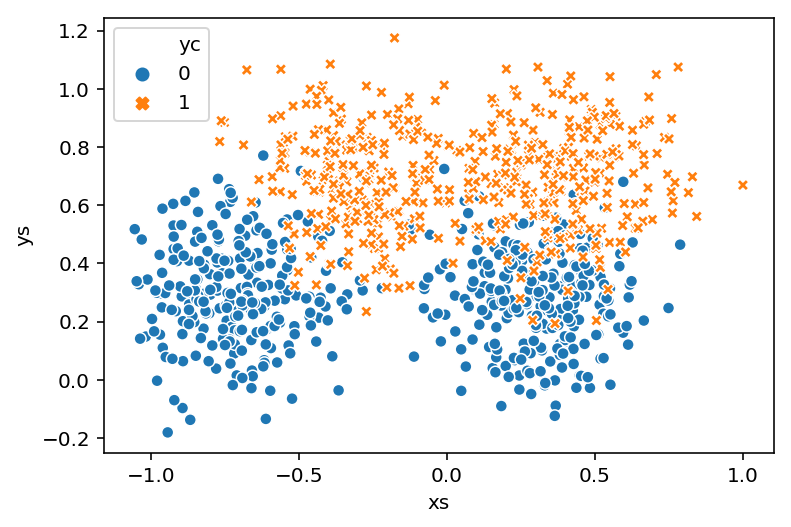

In [7]:
# 1. How many classes/Feature in this dataset
seaborn.scatterplot(x="xs", y="ys", hue="yc",style="yc",data=synthTrainingData,legend="full")

In [39]:
duplicateCheck = synthTrainingData[synthTrainingData.duplicated('ys')]
duplicateCheck['ys'].count()

0

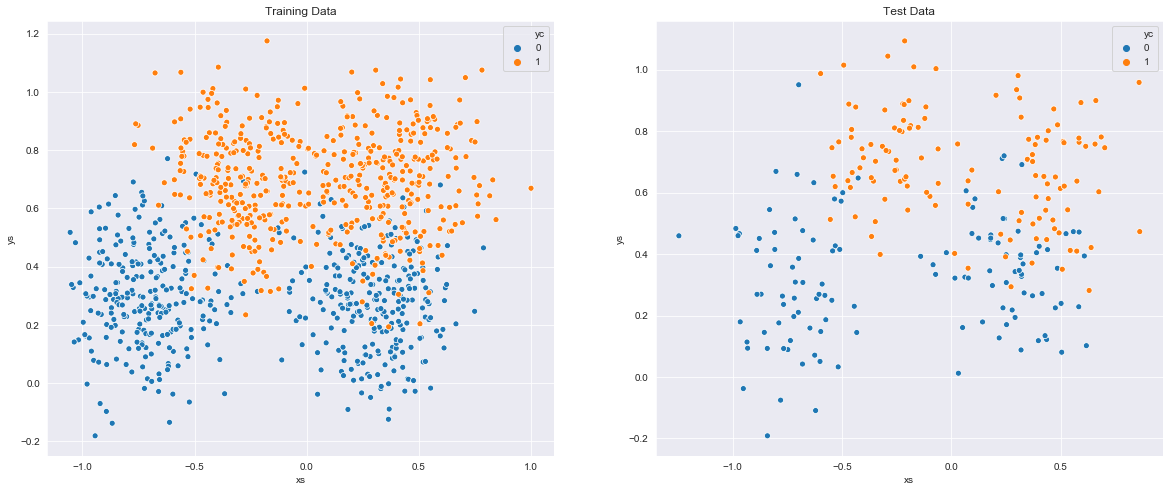

In [52]:
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(x="xs", y="ys", hue="yc",ax=ax1,data=synthTrainingData,legend="full");
sns.scatterplot(x="xs", y="ys", hue="yc",ax=ax2,data=synthTestData,legend="full");
ax2.set_title("Test Data");
ax1.set_title("Training Data");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5E9345780>,
      dtype=object)

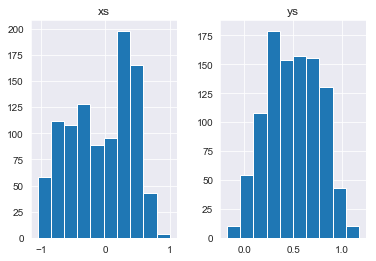

In [78]:
synthTrainingData[["xs","ys"]].hist()

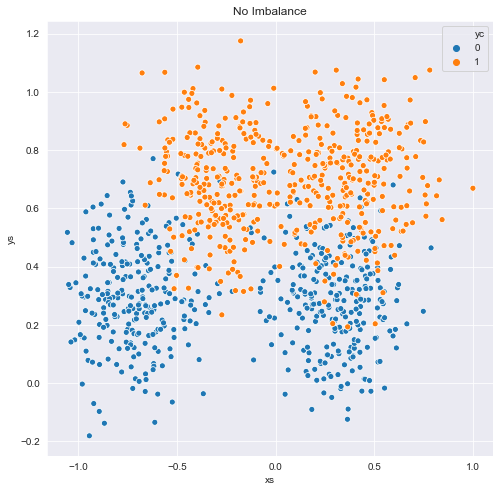

In [74]:
# 2 Is the data Balance/In Balance
f, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
sns.scatterplot(synthTrainingData["xs"],synthTrainingData["ys"],hue="yc",ax=ax1,data=synthTrainingData,legend="full");
ax1.set_title("Balancing of the Data");

plt.show();

In [ ]:
# 3 Which Machine learning Algorithm can be applied, and why
# Supervised, because we have labeled data. we can plan to construct a decision rule bsaed on which we can classify the 
# sample points for the respective categories

In [1]:
%matplotlib inline
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_formats = {'png', 'retina'}

In [8]:

x0=np.array(synthTrainingData[synthTrainingData['yc']==0]['xs'])
y0=np.array(synthTrainingData[synthTrainingData['yc']==0]['ys'])

x1=np.array(synthTrainingData[synthTrainingData['yc']==1]['xs'])
y1=np.array(synthTrainingData[synthTrainingData['yc']==1]['ys'])

z0=np.array([x0,y0]).transpose()
z1=np.array([x1,y1]).transpose()

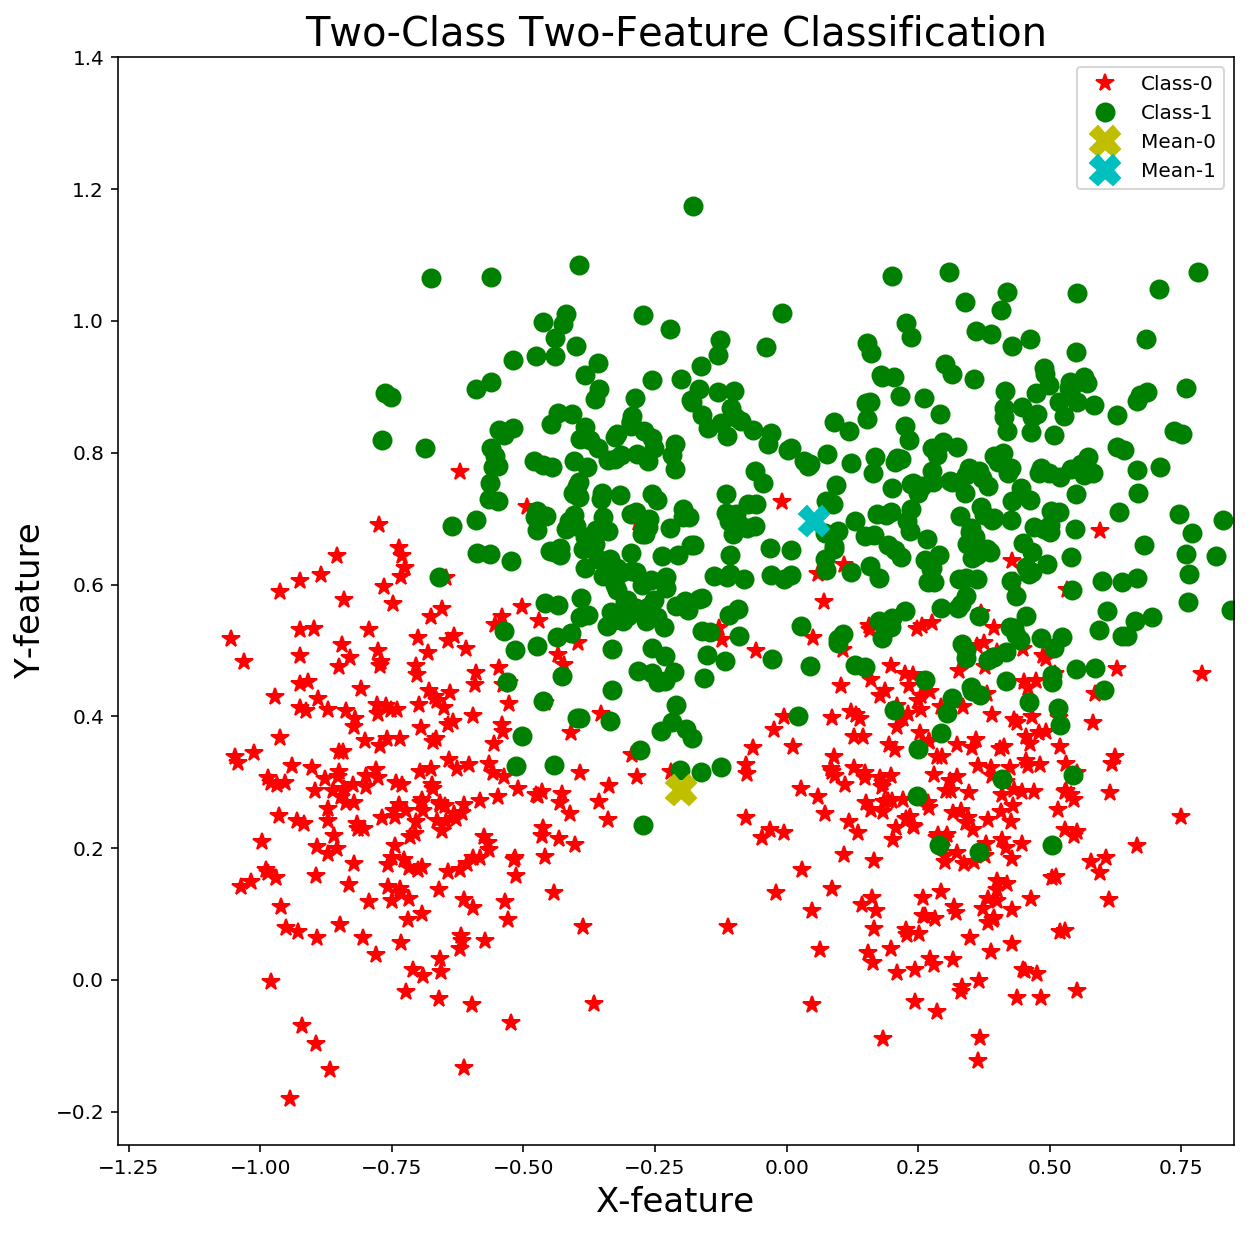

In [9]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

plt.figure(figsize=(10,10))
plt.plot(x0,y0,'r*',label='Class-0', markersize=9)
plt.plot(x1,y1,'go',label='Class-1', markersize=9)

plt.plot(mu0[0],mu0[1],'yX',label='Mean-0', markersize=15)
plt.plot(mu1[0],mu1[1],'cX',label='Mean-1', markersize=15)

plt.ylim(-0.25,1.4)
plt.xlim(-1.27,0.85)
plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
plt.title('Two-Class Two-Feature Classification', fontsize=20)
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

In [10]:
#4 Is Bayesian classifier approach can be adopt.
# Yes, with the assumption that trainig and tes follow Gaussian probability density function, 
# as it looks for Maximum Likelihood Estimator, 


In [11]:
xtest=np.array(synthTestData['xs'])
ytest=np.array(synthTestData['ys'])
ztest=np.array([xtest,ytest]).transpose()

In [12]:
# 5 How many possible cases can be for calculating the Gaussian density,
# in order to identiy the best decision rule
# - Case-1 Bayesian classifier : Sigma_1 = Sigma_2 = sd
# - case 2 Bayesian classified : Sigma1 = Sigma2
# - case 3 Bayesian calssifier : Sigma != Sigma2

# Case 1

In [17]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

sig=(sigma0[0,0]+sigma1[1,1])/2.0
sigma=sig*(np.identity(2, dtype=float))
sigmadet=np.linalg.det(sigma)
sigmainv=np.linalg.inv(sigma)


# Solving for the Decision Boundary in Case-1 
x=Symbol('x')
y=Symbol('y')
zz=np.array([x,y])
z=zz.reshape(1,2)

Prior=0.5
g00=-0.5*(z-mu0).reshape(1,2).dot(sigmainv).dot((z-mu0).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)
g11=-0.5*(z-mu1).reshape(1,2).dot(sigmainv).dot((z-mu1).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)

DB1=solve(g00[0][0]-g11[0][0], y)

print('The linear equation for the decision boundary in case-1:\ny='+str(DB1[0])+'\n\n')

#------------------------------------------------------------------------------------------------------------------------------

#Categorizing based on the Discriminant Function

def g0(data, Prior):
    k,l=data.shape  # k = number of training samples, l = dimension (# of features)
    g0=np.zeros(k)
    for i in range(k):
        g0[i]=-0.5*(data[i]-mu0).reshape(1,l).dot(sigmainv).dot((data[i]-mu0).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g0

def g1(data, Prior):
    k,l=data.shape
    g1=np.zeros(k)
    for i in range(k):
        g1[i]=-0.5*(data[i]-mu1).reshape(1,l).dot(sigmainv).dot((data[i]-mu1).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g1

boolcase1=g0(ztest,0.5)>=g1(ztest,0.5)
boolcase1=np.array([0 if i else 1 for i in boolcase1])  # Converting the True to zero and False to 1.

#-----------------------------------Accuracy Calculation for Case-1------------------------------------------------------
testbool=np.array(synthTestData['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.
accu_case1=testbool+boolcase1
unique1, counts1 = np.unique(accu_case1, return_counts=True)
case1=dict(zip(unique1, counts1))

# print('Case 1 = ' + str(case1))
accuracy_case1= (counts1[0]+counts1[2])/(counts1[0]+counts1[1]+counts1[2])
print('Case 1: Overall Accuracy = ' + str(accuracy_case1))


The linear equation for the decision boundary in case-1:
y=-0.620841327863467*x + 0.445896539520976


Case 1: Overall Accuracy = 0.756


# Case 2

In [19]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

sigma=(sigma0+sigma1)/2.
sigmadet=np.linalg.det(sigma)
sigmainv=np.linalg.inv(sigma)


# Solving for the Decision Boundary in Case-3
x=Symbol('x')
y=Symbol('y')
zz=np.array([x,y])
z=zz.reshape(1,2)

Prior=0.5
g00=-0.5*(z-mu0).reshape(1,2).dot(sigmainv).dot((z-mu0).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)
g11=-0.5*(z-mu1).reshape(1,2).dot(sigmainv).dot((z-mu1).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)

DB2=solve(g00[0][0]-g11[0][0], y)

print('The linear equation for the decision boundary in case-2:\ny='+str(DB2[0])+'\n\n')

#Categorizing based on the Discriminant Function

def g0(data, Prior):
    k,l=data.shape
    g0=np.zeros(k)
    for i in range(k):
        g0[i]=-0.5*(data[i]-mu0).reshape(1,l).dot(sigmainv).dot((data[i]-mu0).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g0

def g1(data, Prior):
    k,l=data.shape
    g1=np.zeros(k)
    for i in range(k):
        g1[i]=-0.5*(data[i]-mu1).reshape(1,l).dot(sigmainv).dot((data[i]-mu1).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g1

boolcase2=g0(ztest,0.5) >= g1(ztest,0.5)
boolcase2=np.array([0 if i else 1 for i in boolcase2])  # Converting the True to zero and False to 1.

#-----------------------------------Accuracy Calculation for Case-3------------------------------------------------------
testbool=np.array(synthTestData['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.
accu_case2=testbool+boolcase2
unique2, counts2 = np.unique(accu_case2, return_counts=True)
case2=dict(zip(unique2, counts2))

# print('Case 2 = ' + str(case2))
accuracy_case2= (counts2[0]+counts2[2])/(counts2[0]+counts2[1]+counts2[2])
print('Case 2: Overall Accuracy = ' + str(accuracy_case2))


The linear equation for the decision boundary in case-2:
y=-0.0932011108935298*x + 0.485197486191374


Case 2: Overall Accuracy = 0.852


# Case 3

In [20]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

sigma0det=np.linalg.det(sigma0)
sigma1det=np.linalg.det(sigma1)
sigma0inv=np.linalg.inv(sigma0)
sigma1inv=np.linalg.inv(sigma1)

# Solving for the Decision Boundary in Case-3
x=Symbol('x')
y=Symbol('y')
zz=np.array([x,y])
z=zz.reshape(1,2)

Prior=0.5
g00=-0.5*(z-mu0).reshape(1,2).dot(sigma0inv).dot((z-mu0).reshape(2,1))-0.5*np.log(sigma0det)+np.log(Prior)
g11=-0.5*(z-mu1).reshape(1,2).dot(sigma1inv).dot((z-mu1).reshape(2,1))-0.5*np.log(sigma1det)+np.log(Prior)

DB3=solve(g00[0][0]-g11[0][0], y)

print('The linear equation for the decision boundary in case-3:\ny='+str(DB3[0])+'\n\n')

#Categorizing based on the Discriminant Function

def g0(data, Prior):
    k,l=data.shape
    g0=np.zeros(k)
    for i in range(k):
        g0[i]=-0.5*(data[i]-mu0).reshape(1,l).dot(sigma0inv).dot((data[i]-mu0).reshape(l,1))-0.5*np.log(sigma0det)+np.log(Prior)
    return g0

def g1(data, Prior):
    k,l=data.shape
    g1=np.zeros(k)
    for i in range(k):
        g1[i]=-0.5*(data[i]-mu1).reshape(1,l).dot(sigma1inv).dot((data[i]-mu1).reshape(l,1))-0.5*np.log(sigma1det)+np.log(Prior)
    return g1


boolcase3=g0(ztest,0.5)>=g1(ztest,0.5) # True if the sample belongs to class-0, False otherwise
boolcase3=np.array([0 if i else 1 for i in boolcase3])  # Converting the True to zero and False to 1.

#-----------------------------------Accuracy Calculation for Case-3------------------------------------------------------
testbool=np.array(synthTestData['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.
accu_case3=testbool+boolcase3
unique3, counts3 = np.unique(accu_case3, return_counts=True)
case3=dict(zip(unique3, counts3))

# print('Case 3 = ' + str(case3))
accuracy_case3= (counts3[0]+counts3[2])/(counts3[0]+counts3[1]+counts3[2])
print('Case 3: Overall Accuracy = ' + str(accuracy_case3))


The linear equation for the decision boundary in case-3:
y=-0.694145115456524*x - 8.29904020746229e-28*sqrt(4.49916102510153e+54*x**2 + 2.12385357972841e+55*x + 2.0614454728688e+56) - 11.4527978250587


Case 3: Overall Accuracy = 0.844


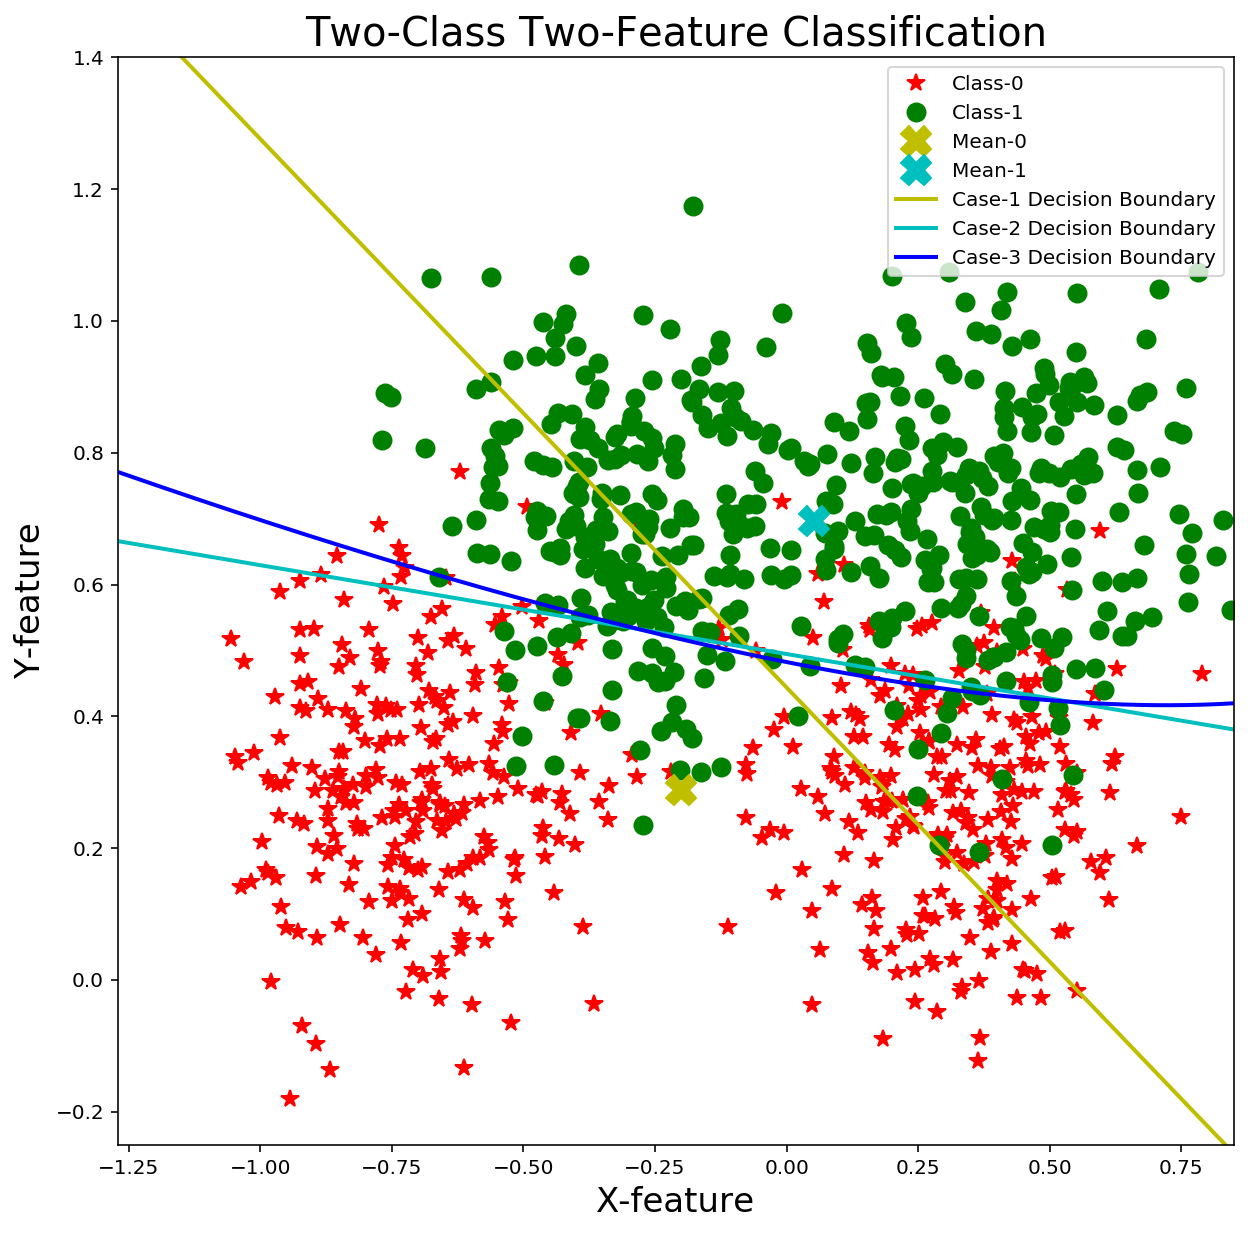

In [23]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

plt.figure(figsize=(10,10))
plt.plot(x0,y0,'r*',label='Class-0', markersize=9)
plt.plot(x1,y1,'go',label='Class-1', markersize=9)

plt.plot(mu0[0],mu0[1],'yX',label='Mean-0', markersize=15)
plt.plot(mu1[0],mu1[1],'cX',label='Mean-1', markersize=15)

xmin, xmax=np.min(np.array(synthTrainingData['xs'])), np.max(np.array(synthTrainingData['xs']))

xplot=np.arange(-1.27, 0.86, 0.01)
# xplot=np.arange(xmin, xmax, 0.01)

plt.plot(xplot, -0.832622948392766*xplot + 0.44378197841356, 'y-', linewidth=2, label='Case-1 Decision Boundary')
plt.plot(xplot, -0.134864086623903*xplot + 0.494549490884199, 'c-', linewidth=2, label='Case-2 Decision Boundary')
plt.plot(xplot, -0.641052306096743*xplot - 8.91426865585982e-25*np.sqrt(-1.51514382948643e+45*(xplot**2) - 1.95123755461517e+48*xplot + 3.25462873130337e+48) + 2.09052329406855, 'b-', linewidth=2, label='Case-3 Decision Boundary')

plt.ylim(-0.25,1.4)
plt.xlim(-1.27,0.85)
plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
plt.title('Two-Class Two-Feature Classification', fontsize=20)
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

# Train and Test data comparison 

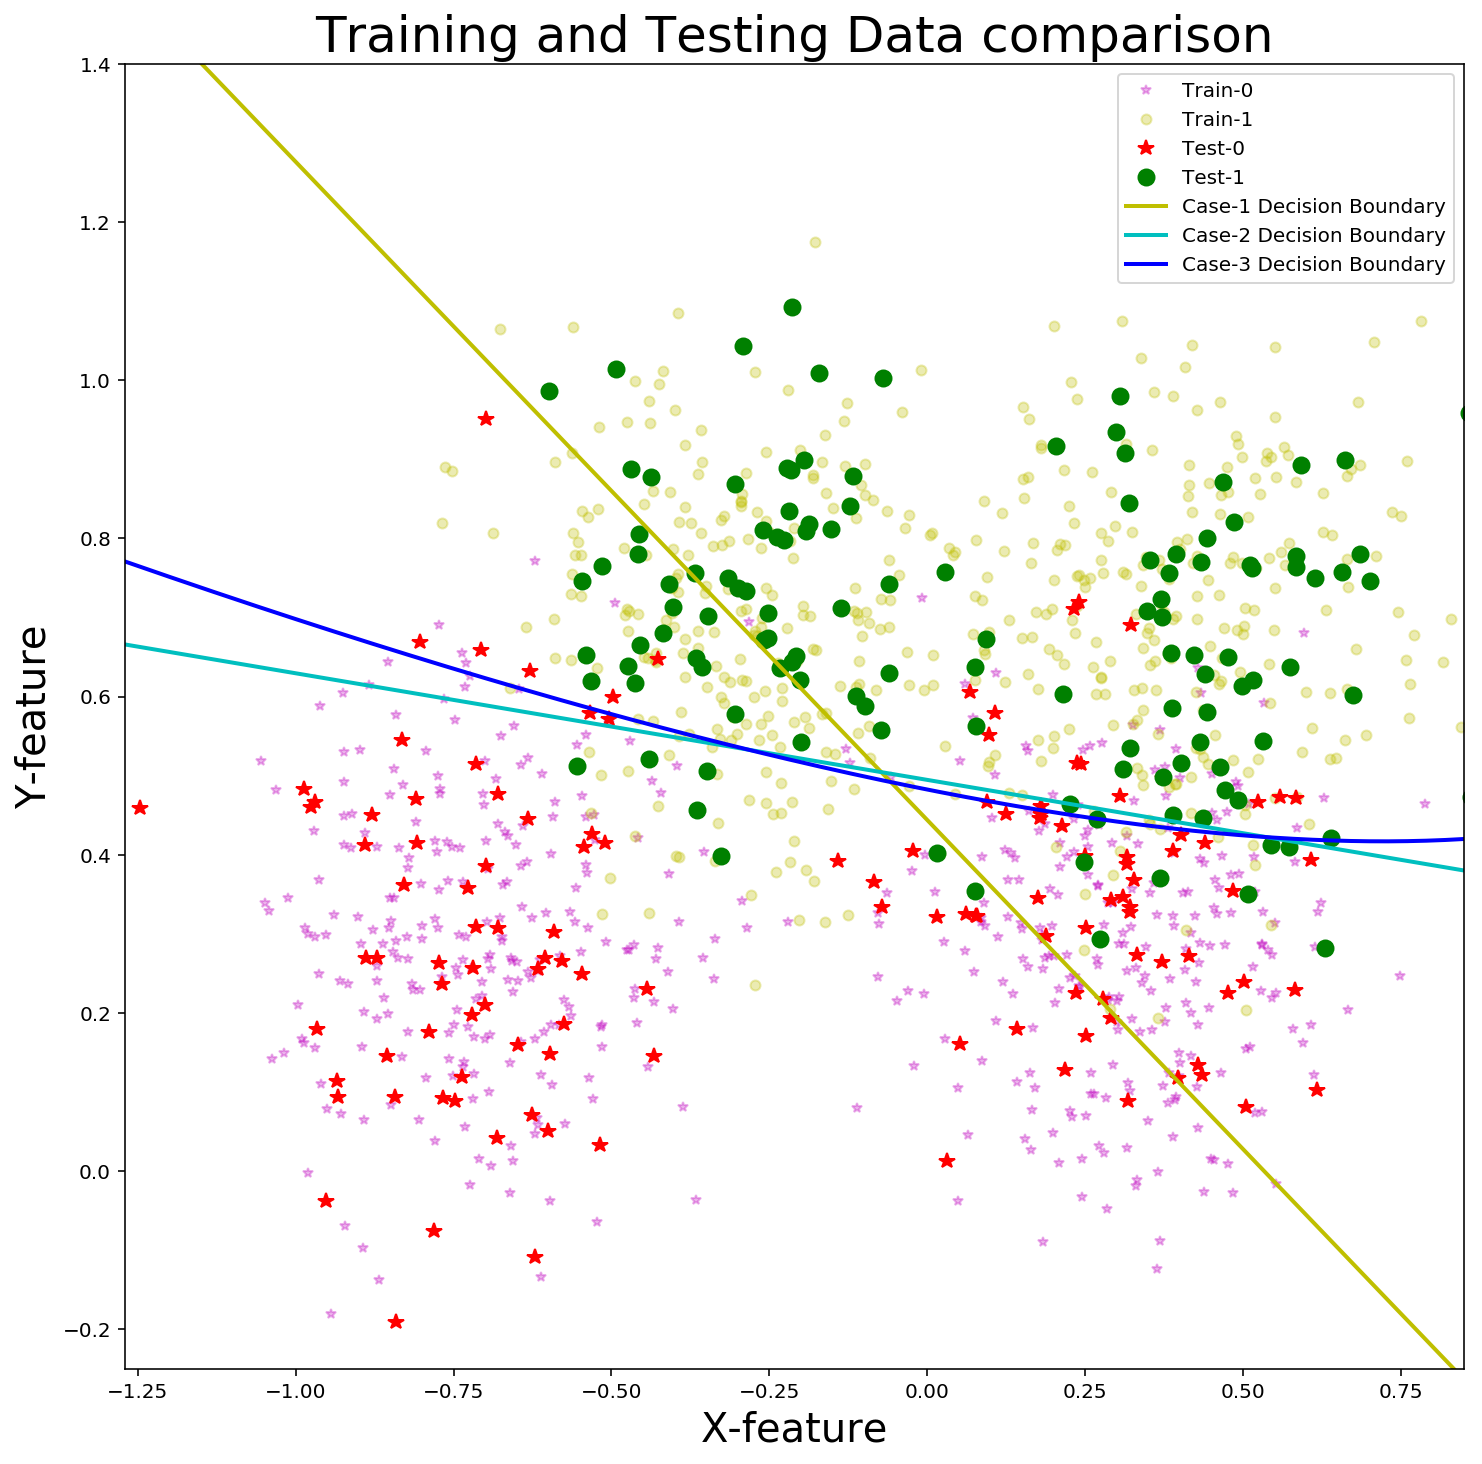

In [26]:
testbool=np.array(synthTestData['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.

#------------------------------------------
xtest0=np.array(synthTestData[synthTestData['yc']==0]['xs'])#
ytest0=np.array(synthTestData[synthTestData['yc']==0]['ys'])#
                                          #
xtest1=np.array(synthTestData[synthTestData['yc']==1]['xs'])#
ytest1=np.array(synthTestData[synthTestData['yc']==1]['ys'])#
#------------------------------------------

plt.figure(figsize=(12,12))
plt.plot(x0,y0,'m*', alpha= 0.3, label='Train-0', markersize=5)
plt.plot(x1,y1,'yo', alpha= 0.3, label='Train-1', markersize=5)
plt.plot(xtest0,ytest0,'r*', label='Test-0', markersize=8)
plt.plot(xtest1,ytest1,'go', label='Test-1', markersize=8)

xmin, xmax=np.min(np.array(synthTrainingData['xs'])), np.max(np.array(synthTrainingData['xs']))

xplot=np.arange(-1.27, 0.86, 0.01)
# xplot=np.arange(xmin, xmax, 0.01)
plt.plot(xplot, -0.832622948392766*xplot + 0.44378197841356, 'y-', linewidth=2, label='Case-1 Decision Boundary')
plt.plot(xplot, -0.134864086623903*xplot + 0.494549490884199, 'c-', linewidth=2, label='Case-2 Decision Boundary')
plt.plot(xplot, -0.641052306096743*xplot - 8.91426865585982e-25*np.sqrt(-1.51514382948643e+45*(xplot**2) - 1.95123755461517e+48*xplot + 3.25462873130337e+48) + 2.09052329406855, 'b-', linewidth=2, label='Case-3 Decision Boundary')

plt.ylim(-0.25,1.4)
plt.xlim(-1.27,0.85)
plt.xlabel('X-feature', fontsize=20)
plt.ylabel('Y-feature', fontsize=20)
plt.title('Training and Testing Data comparison', fontsize=25)
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# 6 which case had given the better accuracy and decision boundary

# Overall accuracy

In [27]:
testbool=np.array(synthTestData['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.

accu_case1=testbool+boolcase1
accu_case2=testbool+boolcase2
accu_case3=testbool+boolcase3

unique1, counts1 = np.unique(accu_case1, return_counts=True)
case1=dict(zip(unique1, counts1))

unique2, counts2 = np.unique(accu_case2, return_counts=True)
case2=dict(zip(unique2, counts2))

unique3, counts3 = np.unique(accu_case3, return_counts=True)
case3=dict(zip(unique3, counts3))

# print('Case 1 = ' + str(case1) + '\n' + 'Case 2 = ' + str(case2) + '\n'+ 'Case 3 = ' + str(case3))

accuracy_case1= (counts1[0]+counts1[2])/(counts1[0]+counts1[1]+counts1[2])
accuracy_case2= (counts2[0]+counts2[2])/(counts2[0]+counts2[1]+counts2[2])
accuracy_case3= (counts3[0]+counts3[2])/(counts3[0]+counts3[1]+counts3[2])

print('Case 1: Overall Accuracy = ' + str(accuracy_case1) + '\n' + 'Case 2: Overall Accuracy = ' + str(accuracy_case2) + '\n'+ 'Case 3: Overall Accuracy = ' + str(accuracy_case3))

Case 1: Overall Accuracy = 0.756
Case 2: Overall Accuracy = 0.852
Case 3: Overall Accuracy = 0.844


In [ ]:
# 7 Identifying the predicting and true label from the test data.

In [80]:
X = synthTrainingData[["xs","ys"]].values
y = synthTrainingData[["yc"]].values

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [96]:
from sklearn import metrics

In [97]:
print(metrics.accuracy_score(y_test, y_pred))

0.8866666666666667


In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

array([[125,  19],
       [ 15, 141]], dtype=int64)

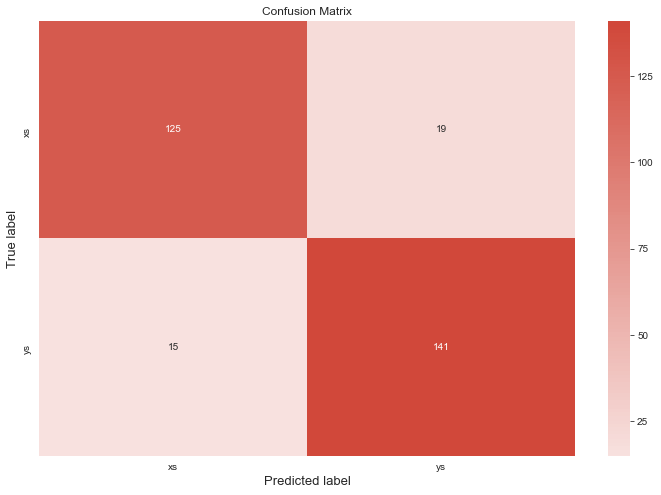

In [93]:
cm_df = pd.DataFrame(cm,
                     index = ['xs','ys'], 
                     columns = ['xs','ys'])
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()